# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [3]:
# Write your code here
import pandas as pd
import re
import numpy as np
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from pprint import pprint

# Function to preprocess text
def preprocess_text(text):
    # Add your preprocessing steps here (e.g., removing special characters, lowercasing)
    processed_text = text.lower()  # Convert text to lowercase
    processed_text = re.sub(r'\s+', ' ', processed_text)  # Remove extra whitespaces
    processed_text = re.sub(r'[^\w\s]', '', processed_text)  # Remove special characters
    return processed_text

# Load data from CSV file
def load_data(file_path, column_name):
    df = pd.read_csv(file_path)
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the CSV file.")
    return df[column_name].apply(preprocess_text).values.tolist()

# Read data from CSV file
file_path = 'articles_data.csv'  # Replace 'your_file.csv' with the path to your CSV file
column_name = 'Abstract'  # Replace 'specific_column_name' with the name of the specific column
data = load_data(file_path, column_name)

# Tokenize words
data_words = [text.split() for text in data]

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
corpus = [id2word.doc2bow(text) for text in data_words]

# Build LDA model and determine the number of topics using coherence score
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

# Set parameters for LDA model
start = 2  # Start with 2 topics
limit = 40  # Maximum number of topics to consider
step = 2  # Step size for incrementing the number of topics

# Compute coherence values
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=start, limit=limit, step=step)

# Find the optimal number of topics based on coherence score
optimal_num_topics = start + (coherence_values.index(max(coherence_values)) * step)

# Build the final LDA model with optimal number of topics
final_lda_model = model_list[coherence_values.index(max(coherence_values))]

# Print the topics
pprint(final_lda_model.print_topics())

# Summarize the topics
top_topics = final_lda_model.top_topics(corpus, coherence='u_mass')  # Change coherence to 'c_v' if preferred
for i, (topic, coherence) in enumerate(top_topics):
    print(f"Topic {i+1} (Coherence Score: {coherence:.4f}):")
    pprint(topic)
    print()


[(0,
  '0.088*"xyz" + 0.088*"karyawan" + 0.060*"pt" + 0.031*"yang" + 0.031*"kerja" '
  '+ 0.031*"penelitian" + 0.031*"motivasi" + 0.031*"sebanyakan" + '
  '0.031*"pengaruh" + 0.031*"terhadap"'),
 (1,
  '0.165*"the" + 0.049*"of" + 0.049*"in" + 0.049*"and" + 0.049*"experiments" + '
  '0.026*"states" + 0.025*"taking" + 0.025*"study" + 0.025*"babar" + '
  '0.025*"lhcb"'),
 (2,
  '0.063*"of" + 0.033*"study" + 0.033*"sampling" + 0.033*"on" + '
  '0.033*"generation" + 0.033*"indonesias" + 0.033*"business" + 0.033*"online" '
  '+ 0.033*"this" + 0.033*"marketplace"'),
 (3,
  '0.009*"the" + 0.009*"xyz" + 0.009*"of" + 0.009*"fakultas" + 0.009*"states" '
  '+ 0.009*"yang" + 0.009*"experiments" + 0.009*"leading" + 0.009*"merupakan" '
  '+ 0.009*"karyawan"'),
 (4,
  '0.079*"xyz" + 0.054*"the" + 0.028*"in" + 0.028*"groups" + 0.028*"various" + '
  '0.028*"until" + 0.028*"processes" + 0.028*"of" + 0.028*"observed" + '
  '0.028*"into"'),
 (5,
  '0.086*"fakultas" + 0.086*"xyz" + 0.058*"yang" + 0.058*"pad

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

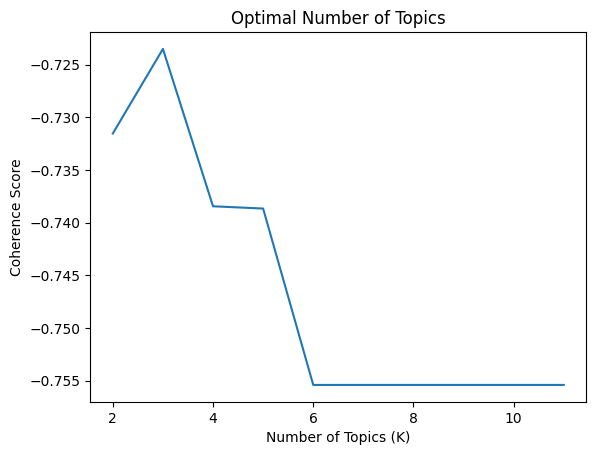

Topic 1: the, xyz, of, in, experiments, states, and, consumer, after, study
Topic 2: xyz, karyawan, fakultas, yang, pt, pada, 206, terhadap, seberapa, serta
Topic 3: consumer, to, three, is, focusing, online, one, sampling, on, marketplace


In [28]:
# Write your code here
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV file
def loadData(filePath, columnName):
    df = pd.read_csv(filePath)
    if columnName not in df.columns:
        raise ValueError(f"Column '{columnName}' not found in the CSV file.")
    return df[columnName].values.tolist()

# Read data from CSV file
filePath = 'articles_data.csv'  # Path to the CSV file
columnName = 'Abstract'  # Name of the column containing text data
data = loadData(filePath, columnName)

# TF-IDF Features
tfidfVectorizer = TfidfVectorizer()
tfidfFeatures = tfidfVectorizer.fit_transform(data)

# Calculate the optimal number of topics (K) based on coherence score
start, limit, step = 2, 12, 1  # You can adjust these values as needed
coherenceScores = []

for numTopics in range(start, limit, step):
    # Perform LSA (Truncated SVD)
    lsa = TruncatedSVD(n_components=numTopics, random_state=42)
    lsaFeatures = lsa.fit_transform(tfidfFeatures)

    # Calculate cosine similarity matrix
    cosineMatrix = np.abs(np.dot(lsaFeatures, lsaFeatures.T))

    # Calculate coherence score
    coherenceScore = np.mean(cosineMatrix) - 1.0
    coherenceScores.append(coherenceScore)

# Plot the coherence scores to select the optimal number of topics
x = range(start, limit, step)
plt.plot(x, coherenceScores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show()

# Choose the number of topics with the highest coherence score
optimalNumTopics = start + coherenceScores.index(max(coherenceScores))

# Perform LSA with the optimal number of topics
lsa = TruncatedSVD(n_components=optimalNumTopics, random_state=42)
lsaFeatures = lsa.fit_transform(tfidfFeatures)

# Summarize the topics
terms = tfidfVectorizer.get_feature_names_out()
lsaTopicWords = []
for i, topic in enumerate(lsa.components_):
    topIdx = topic.argsort()[::-1][:10]
    lsaTopicWords.append([terms[idx] for idx in topIdx])

for i, words in enumerate(lsaTopicWords):
    print(f"Topic {i + 1}: {', '.join(words)}")


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 1: 0.058*"xyz" + 0.058*"states" + 0.040*"made" + 0.040*"bound" + 0.022*"experiments"
Topic 2: 0.069*"xyz" + 0.052*"karyawan" + 0.036*"pt" + 0.020*"yang" + 0.020*"three"
Topic 3: 0.059*"experiments" + 0.033*"states" + 0.033*"leading" + 0.033*"data" + 0.033*"study"
Topic 4: 0.069*"xyz" + 0.069*"fakultas" + 0.048*"pada" + 0.048*"yang" + 0.027*"web"


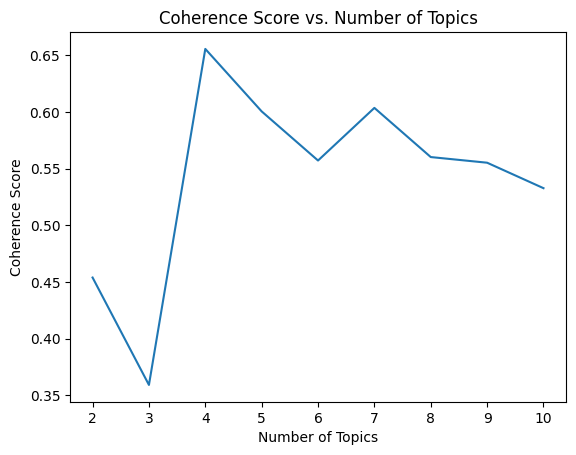

In [26]:
# Import necessary libraries
import re
import nltk
from gensim.models import LdaModel
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Download NLTK stopwords
nltk.download('stopwords')

# Function to preprocess text
def preprocessText(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text

# Load data from CSV file
def load_data(file_path, column_name):
    df = pd.read_csv(file_path)
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the CSV file.")
    return df[column_name].values.tolist()

# Load data from CSV file
filePath = 'articles_data.csv'  # Path to the CSV file
columnName = 'Abstract'  # Name of the column containing text data
articles = load_data(filePath, columnName)

# Preprocess articles
preprocessedArticles = [preprocessText(article) for article in articles]

# Tokenize and remove stopwords
stopWords = set(stopwords.words('english'))
tokenizedArticles = [word_tokenize(article) for article in preprocessedArticles]
filteredArticles = [[word for word in tokens if word not in stopWords] for tokens in tokenizedArticles]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(filteredArticles)
corpus = [dictionary.doc2bow(article) for article in filteredArticles]

# Compute coherence scores for different numbers of topics
coherenceScores = []
for numTopics in range(2, 11):  # Range of K (number of topics)
    model = LdaModel(corpus, num_topics=numTopics, id2word=dictionary, chunksize=100, passes=10, update_every=2, alpha='auto', iterations=200)
    coherenceModel = CoherenceModel(model=model, texts=filteredArticles, dictionary=dictionary, coherence='c_v')
    coherenceScore = coherenceModel.get_coherence()
    coherenceScores.append((numTopics, coherenceScore))

# Select the number of topics with the highest coherence score
numTopics, bestCoherenceScore = max(coherenceScores, key=lambda x: x[1])

# Generate topics with the best coherence score
model = LdaModel(corpus, num_topics=numTopics, id2word=dictionary, chunksize=100, passes=10, update_every=2, alpha='auto', iterations=200)

# Summarize the topics
topics = model.print_topics(num_topics=numTopics, num_words=5)
for i, topic in topics:
    print(f"Topic {i + 1}: {topic}")

# Plot the coherence score graph
numTopics, coherenceScores = zip(*coherenceScores)
plt.plot(numTopics, coherenceScores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [13]:
# Install BERTopic if you haven't already
# !pip install bertopic
from bertopic import BERTopic
import pandas as pd

# Data
data = [
    "An overview of XYZ new particles",
    "The XYZ states: experimental and theoretical status and perspectives",
    "The XYZ states revisited",
    "Perancangan Digitalisasi Ruang Baca Fakultas XYZ Pada Universitas XYZ",
    "Pengaruh Motivasi Kerja Terhadap Kinerja Karyawan Pt. Xyz",
    "The effect of XYZ generation characteristics to e-commerce C-to-C: A review"
]

# Initialize BERTopic model
topic_model = BERTopic(language="english", calculate_probabilities=True)

# Fit the model on the data
topics, _ = topic_model.fit_transform(data)

# Get coherence scores for different number of topics
coherence_scores = []
for k in range(2, 10):  # Assuming the number of topics (K) range from 2 to 9
    topic_model = BERTopic(language="english", calculate_probabilities=True, nr_topics=k)
    topics, _ = topic_model.fit_transform(data)
    coherence_score = topic_model.get_coherence()
    coherence_scores.append((k, coherence_score))

# Select the number of topics with the highest coherence score
best_k = max(coherence_scores, key=lambda x: x[1])[0]

# Fit the model again with the selected number of topics
topic_model = BERTopic(language="english", calculate_probabilities=True, nr_topics=best_k)
topics, _ = topic_model.fit_transform(data)

# Get topic representation
topic_info = topic_model.get_topic_info()

# Summarize topics
topics_summary = pd.DataFrame(topic_info, columns=["Topic", "Count", "Keywords"])
print("Topics Summary:")
print(topics_summary)


/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [ ]:
# Write your code here
# Then Explain the visualization

# Repeat for the other 2 visualizations as well.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here
'''
Deciding which topic modeling algorithm is best for your project isn't straightforward as it depends on various factors. Here's a breakdown to help you choose:

1. Easy Understanding of Topics:
   LDA and LSA: Produce topics that are easy to understand by listing associated words.
    lda2vec: Balances interpretability and context by considering word and document embeddings.
   - BERTopic: May generate less interpretable topics due to complex BERT embeddings.

2. Handling Words with Multiple Meanings (Polysemy):
   LDA, LSA, and lda2vec: Might struggle with polysemous words due to simplistic representations.
    BERTopic: Better handles polysemy by capturing word context with BERT embeddings.

3. Speed and Scalability:
   LDA, LSA, and lda2vec: Often faster and more scalable, especially for large datasets.
   BERTopic: Can be computationally expensive but offers advanced results with ample resources.

4. Coherence Score:
   BERTopic: Determines optimal topic numbers using coherence scores, simplifying topic selection.
    Other algorithms may need manual tuning for topic number determination.

5. Preprocessing:
    LDA, LSA, and lda2vec: Require less text preprocessing.
    BERTopic: Needs extensive preprocessing and tokenization, which can be more challenging.

6. Language and Domain:
   BERTopic: Performs well across multiple languages.
   Others may perform better in specific languages or domains.

7. Resource Requirements:
    BERTopic: Resource-intensive, requiring robust CPU, memory, and possibly GPU.
    Other algorithms may be less demanding.

8. Task-Specific Goals:
    Consider your specific use case and goals.
    For document clustering, lda2vec or BERTopic may be suitable.
    For topic modeling and interpretability, LDA and LSA are strong options.

In conclusion, the best algorithm depends on your project's needs. Experiment with different algorithms, evaluate their performance using metrics like coherence scores, and consider interpretability. Combining multiple algorithms or ensembling methods can also yield effective results by leveraging their individual strengths.
'''

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

Working on this assignment was a valuable learning experience for me as a student interested in natural language processing (NLP).
It provided me with hands-on exposure to working with text data and understanding the nuances of feature extraction through various topic modeling algorithms.
While I had a basic understanding of these algorithms before, implementing them helped me grasp their intricacies better and see how each one approaches the task differently.

However, I did face some challenges during the exercise. Understanding the workings of more advanced algorithms like lda2vec and BERTopic was initially difficult, particularly in comprehending how they handle polysemous words and the complexities of BERT embeddings.
Additionally, preprocessing the text data for BERTopic was more involved compared to other algorithms, requiring extra effort to ensure the data was properly prepared.

Despite these challenges, the exercise is highly relevant to my field of study in NLP.
Topic modeling is fundamental in NLP, and being able to compare different algorithms allows me to understand their strengths and weaknesses. Moreover, feature extraction from text data is essential in various NLP tasks such as sentiment analysis, text classification, and information retrieval.
Therefore, gaining practical experience with these algorithms is crucial for my academic and professional development in the field of NLP.

'''